# 贝塔分布

## 基本概念

**贝塔分布**是定义在区间$[0, 1]$上的连续概率分布，由两个正参数$\alpha$和$\beta$控制。它常用于描述比例、概率或百分比等受限变量的不确定性。它在**互联网AB实验**中特别有用，常用于建模**点击率（CTR）**、**转化率（CVR）**、**留存率**等比例型指标的不确定性。
- **为什么贝塔分布在AB实验中重要？**
    - 在AB实验中，我们经常关心的是某个事件发生的概率（如点击率、转化率）。贝塔分布天然适合描述这类**比例型随机变量**，因为：
        - 定义域是$[0,1]$：直接对应概率或比例。
        - **灵活性**：通过调整$\alpha$和$\beta$，可以拟合不同的数据分布（如U形、钟形、偏态）。
        - **共轭先验**：在贝叶斯统计中，贝塔分布是**二项分布**的共轭先验，使得后验分布计算非常方便。
        - **典型应用场景**：
            - **点击率（CTR）建模**：用户点击广告的概率。
            - **转化率（CVR）建模**：用户完成购买的概率。
            - **留存率建模**：用户次日/7日留存概率。
            - **贝叶斯AB测试**：动态更新实验组和对照组的概率分布。

## 概率密度函数

设$X \sim \text{Beta}(\alpha, \beta)$，
其概率密度函数为：
$$f(x; \alpha, \beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}$$
其中，
- $B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$ 是贝塔函数
- $\Gamma$ 为伽马函数
- $x \in [0, 1]$
- $\alpha > 0$, $\beta > 0$

- **直观理解**
    - $\alpha-1$：可以看作“成功”次数（如点击次数）。
    - $\beta-1$：可以看作“失败”次数（如未点击次数）。
    - $\alpha+\beta$：可以看作“总试验次数”的某种度量。
- **特殊情形**：
    - $\alpha=1,\beta=1$：贝塔分布退化为$[0,1]$上的均匀分布
    - $\alpha>\beta$：分布向右偏（概率倾向于接近1）。
    - $\alpha<\beta$：分布向左偏（概率倾向于接近0）。
    - $\alpha=\beta$：对称分布（峰值在0.5附近）。

## 均值与方差

**均值：**

$$E[X] = \frac{\alpha}{\alpha + \beta}$$

**方差：**
$$D\text{Var}(X) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$$


## 性质

- **形状灵活性**
| 参数组合   | 分布形状       | 适用场景           |
|------------|----------------|--------------------|
| α=1, β=1   | 均匀分布       | 无先验信息         |
| α>1, β>1   | 单峰（钟形）   | 数据较稳定         |
| α<1, β<1   | U形（两端高）  | 极端概率更可能     |
| α>β        | 右偏           | 高CTR场景          |
| α<β        | 左偏           | 低CTR场景          |
- **图像形状与实验数据关系**
    - **样本大小对分布形状的影响**：
        - **样本少**：分布宽，像一团云 → 说明我们对概率不确定
        - **样本多**：分布窄，像一根针 → 说明我们对概率很有信心
    - **Beta分布随样本变化**：
        - $\text{Beta}(1,1)$：完全不知道点击率 
        - $\text{Beta}(21,81)$：数据支持点击率 ≈ 0.21 
        - $\text{Beta}(210,810)$：几乎可以确定点击率 ≈ 0.21，分布非常尖锐 

## 图形

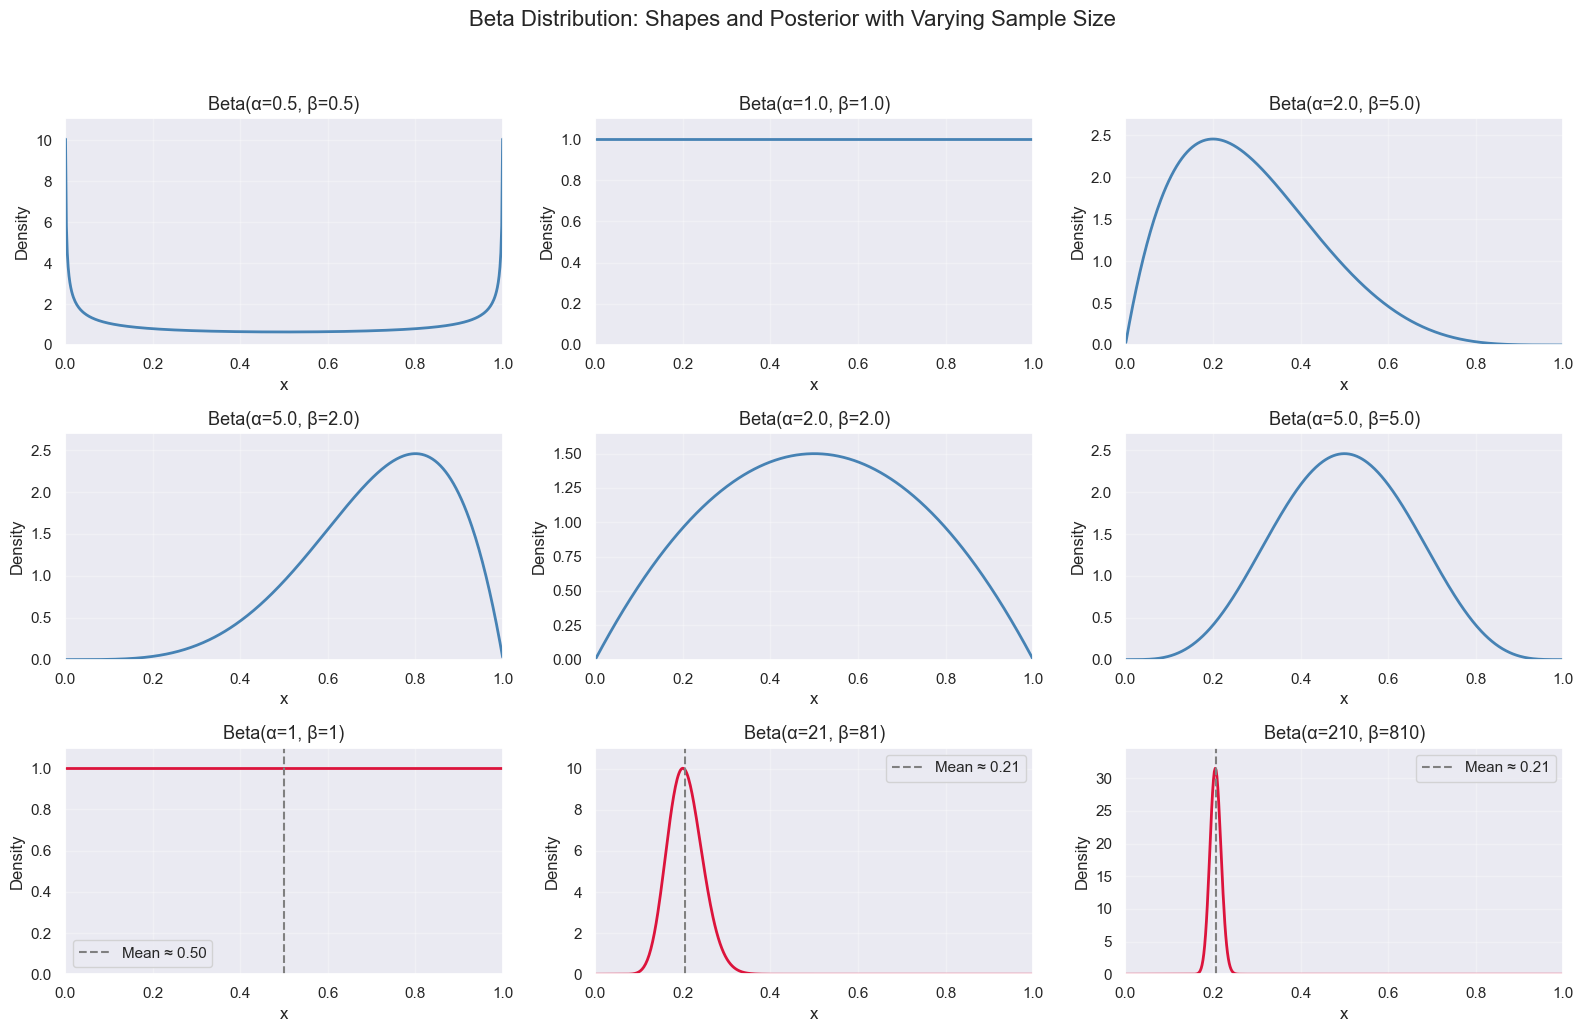

In [10]:
# 导入所需库
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import seaborn as sns

# 设置图表风格
sns.set(style="darkgrid")

# ========== 第一部分：定义参数列表 ==========
# 用于前两行的 Beta 分布形状（共6组）
shape_params = [
    (0.5, 0.5),   # U型
    (1.0, 1.0),   # 均匀
    (2.0, 5.0),   # 偏右
    (5.0, 2.0),   # 偏左
    (2.0, 2.0),   # 对称
    (5.0, 5.0)    # 高度集中
]

# 用于最后一行的样本变化（点击率大致为0.21）
sample_params = [
    (1, 1),        # 无先验
    (21, 81),      # 少量样本
    (210, 810)     # 大量样本
]

# 定义 x 轴范围（避免0和1）
x = np.linspace(0.001, 0.999, 500)

# 创建 3×3 的子图布局
fig, axes = plt.subplots(3, 3, figsize=(16, 10))
axes = axes.flatten()  # 展平便于索引

# ========== 第二部分：绘制前两行的 Beta 分布形状 ==========
for i, (a, b) in enumerate(shape_params):
    y = beta.pdf(x, a, b)  # 计算密度函数
    ax = axes[i]
    ax.plot(x, y, color='steelblue', lw=2)
    ax.set_title(f"Beta(α={a}, β={b})", fontsize=13)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, max(y)*1.1)
    ax.set_xlabel("x")
    ax.set_ylabel("Density")
    ax.grid(alpha=0.3)

# ========== 第三部分：绘制样本量变化对应的 Beta 分布 ==========
for j, (a, b) in enumerate(sample_params):
    idx = j + 6  # 最后一行从第6号图开始
    y = beta.pdf(x, a, b)
    mean = a / (a + b)  # 计算均值
    ax = axes[idx]
    ax.plot(x, y, color='crimson', lw=2)
    ax.axvline(mean, color='gray', linestyle='--', label=f"Mean ≈ {mean:.2f}")
    ax.set_title(f"Beta(α={a}, β={b})", fontsize=13)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, max(y)*1.1)
    ax.set_xlabel("x")
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid(alpha=0.3)

# ========== 第四部分：整体布局优化 ==========
plt.suptitle("Beta Distribution: Shapes and Posterior with Varying Sample Size", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

- **前两行展示**
| 子图编号 | 参数             | 特征          |
| ---- | -------------- | ----------- |
| 1    | Beta(0.5, 0.5) | 极端值偏好（U型）   |
| 2    | Beta(1, 1)     | 均匀分布        |
| 3    | Beta(2, 5)     | 成功较少，低点击率集中 |
| 4    | Beta(5, 2)     | 成功较多，高点击率集中 |
| 5    | Beta(2, 2)     | 对称，概率居中     |
| 6    | Beta(5, 5)     | 高集中度，分布尖    |
- **第三行展示**
| 子图编号 | 参数             | 含义                     |
| ---- | -------------- | ---------------------- |
| 7    | Beta(1, 1)     | 无信息，完全不确定点击率           |
| 8    | Beta(21, 81)   | 有一定样本支持 $p ≈ 0.21$     |
| 9    | Beta(210, 810) | 很多样本支持 $p ≈ 0.21$，分布很尖 |
- **图像形状与实验数据关系**
    - **样本大小对分布形状的影响**：
        - **样本少**：分布宽，像一团云 → 说明我们对概率不确定
        - **样本多**：分布窄，像一根针 → 说明我们对概率很有信心
    - **Beta分布随样本变化**：
        - $\text{Beta}(1,1)$：完全不知道点击率 
        - $\text{Beta}(21,81)$：数据支持点击率 ≈ 0.21 
        - $\text{Beta}(210,810)$：几乎可以确定点击率 ≈ 0.21，分布非常尖锐

# 与其他分布的关系

## 与均匀分布
$\alpha=1,\beta=1$：贝塔分布退化为$[0,1]$上的均匀分布
$$\text{Beta}(1, 1) = \text{Uniform}(0, 1)$$
